# CHATBOT FOR DATA SCIENCE INTERVIEW QUESTIONS

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import string 
import re
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import imread
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('data_new.csv').drop(['Unnamed: 0','index'],axis=1)
data

,Topics,Questions,Answers
0,basic data science,What is Data Science? List the differences bet...,"Data Science is a blend of various tools, algo..."
1,Basic Data Science,What is Selection Bias?,Selection bias is a kind of error that occurs ...
2,Basic Data Science,What is bias-variance trade-off?,Bias: Bias is an error introduced in your mode...
3,Basic Data Science,What is a confusion matrix?,The confusion matrix is a 2X2 table that conta...
4,Statistics,What is the difference between �long� and �wid...,"In the wide-format, a subject�s repeated respo..."
...,...,...,...
105,nlp,What do you understand by Natural Language Pro...,Natural Language Processing is a field of comp...
106,nlp,List any two real-life applications of Natural...,Google Translate: Google Translate is one of t...
107,nlp,What are stop words?,Stop words are said to be useless data for a s...
108,nlp,What is NLTK?,"NLTK is a Python library, which stands for Nat..."


## Data Preprocessing 

In [3]:
import re
import string
import nltk
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITHU\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
def clean_text(text):
    text = text.lower()                                                       # lower case
    text = re.sub(r"\S*https?:\S*", "", text)                                 # removing links
    text = re.sub('\[.*?\]', '', text)                                        # removing text in square brackets
    text = re.sub(r"[’…�]", "", text)                                        # removing special chracters
    text = re.sub("[0-9" "]+"," ",text)                                       # removing numbers
    text = text.translate(str.maketrans('', '', string.punctuation))          # remove punctuations 
    text_tokens = word_tokenize(text)                                         # Tokenization
    stop_words = stopwords.words('english')
    newStopWords = ['different','example','used','also','likely','non','use','take','often','recent','see','head','tell','back',
                    'etc','give','using','would','given','due','called','make','many','image','understand',
                    'difference','preferred','eg','fruit',
                    'help','may','try','u','explain','happen','define','reason','describe','cite','coin','star','girl']
    stop_words.extend(newStopWords)
    stop_tokens = [word for word in text_tokens if not word in stop_words]    # Remove stop words
    stop_text = ' '.join(stop_tokens)
    lemmas = TextBlob(stop_text)         
    lemmas_token = [w.lemmatize() for w in lemmas.words]                      # Lemmatization
    lemmas_text = ' '.join(lemmas_token)
    return lemmas_text
clean = lambda x: clean_text(x)

In [5]:
data['Topics'] = data['Topics'].apply(clean)
data['Questions'] = data['Questions'].apply(clean)
data['Answers'] = data['Answers'].apply(clean)

## Exploratory Data Analysis 

### Number of question in each topics

<AxesSubplot:xlabel='Topics', ylabel='count'>

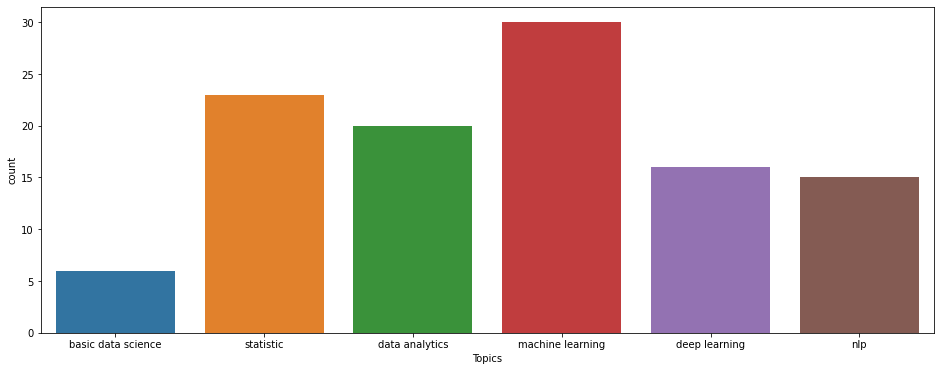

In [6]:
plt.figure(figsize=(16, 6))
sns.countplot(data['Topics'])

In [7]:
data['Topics'].value_counts()

machine learning      30
statistic             23
data analytics        20
deep learning         16
nlp                   15
basic data science     6
Name: Topics, dtype: int64

In [8]:
length_que = data['Questions'].apply(len)
data = data.assign(question_length=length_que)
length_ans = data['Answers'].apply(len)
data = data.assign(answer_length=length_ans)
data.to_csv("length.csv")

In [9]:
data['question_length'].max()

89

### Length of questions in the dataset

<AxesSubplot:xlabel='Questions', ylabel='question_length'>

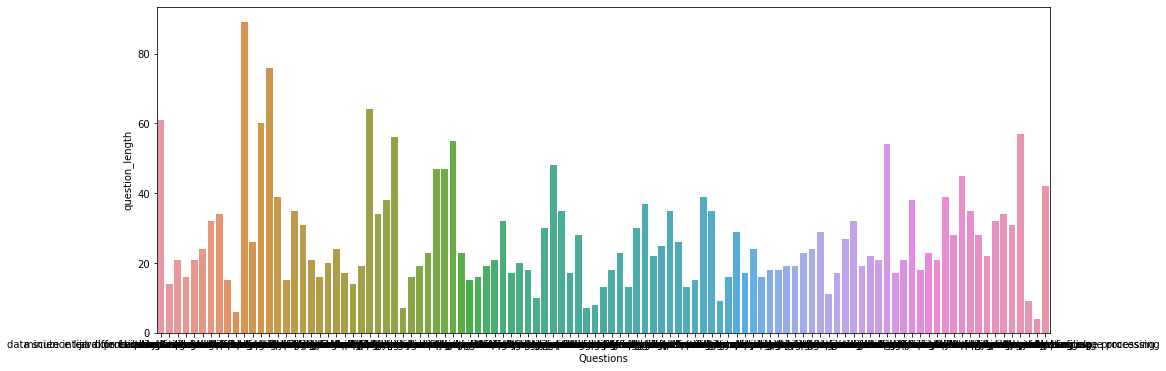

In [10]:
plt.figure(figsize=(16, 6))
sns.barplot(data['Questions'],data['question_length'])

### Length of answers in the dataset 

<AxesSubplot:xlabel='Answers', ylabel='question_length'>

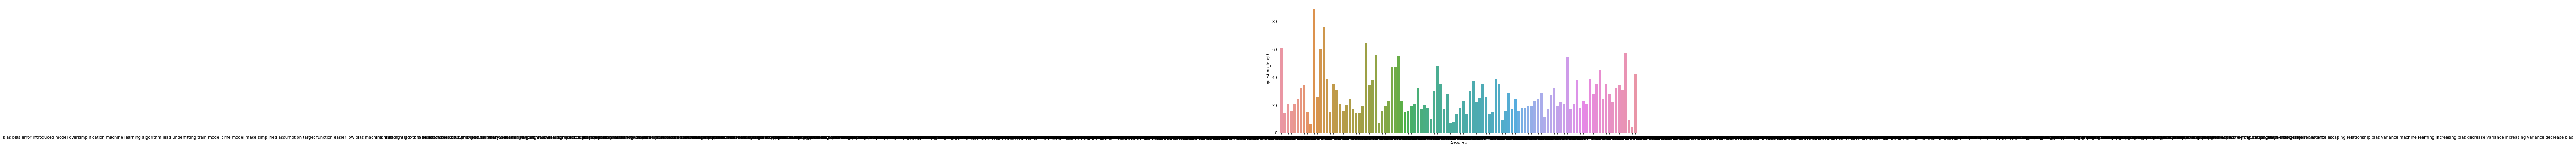

In [11]:
plt.figure(figsize=(16, 6))
sns.barplot(data['Answers'],data['question_length'])

In [12]:
data_bds = data[data['Topics'] == 'basic data science']
data_stat = data[data['Topics'] == 'statistic']
data_da = data[data['Topics'] == 'data analytics']
data_ml = data[data['Topics'] == 'machine learning']
data_nlp = data[data['Topics'] == 'nlp']
data_dl = data[data['Topics'] == 'deep learning']

###  Bigrams for Topics

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
def get_ngrams(corpus, n=None):
    cv_1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_words = cv_1.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_1.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [15]:
top_words = get_ngrams(data["Topics"], n=150) 
top_150 = pd.DataFrame(top_words)
top_150.columns=["Ngram", "Freq"]
top_150.head()

,Ngram,Freq
0,machine learning,30
1,data analytics,20
2,deep learning,16
3,basic data,6
4,data science,6


[Text(0, 0, 'machine learning'),
 Text(1, 0, 'data analytics'),
 Text(2, 0, 'deep learning'),
 Text(3, 0, 'basic data'),
 Text(4, 0, 'data science')]

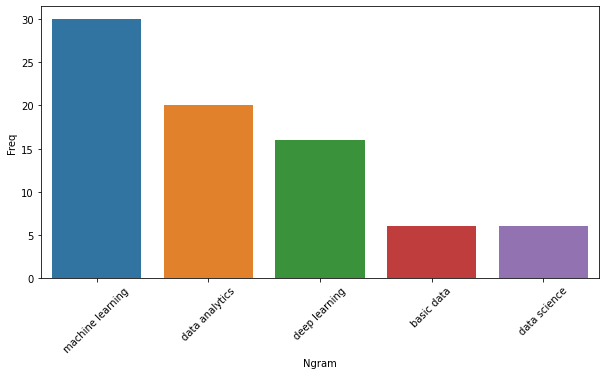

In [16]:
top_n = top_150.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top_n["Ngram"],y=top_n["Freq"])
plot.set_xticklabels(rotation=45,labels = top_n["Ngram"])

### Bigrams for Answers in Machine Learning 

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
def get_unigrams(corpus, n=None):
    cv_2= CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_words = cv_2.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_2.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [19]:
top_words = get_unigrams(data_nlp["Answers"], n=200) 
top_200 = pd.DataFrame(top_words)
top_200.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'neural network'),
 Text(1, 0, 'natural language'),
 Text(2, 0, 'gradient descent'),
 Text(3, 0, 'stop word'),
 Text(4, 0, 'activation function'),
 Text(5, 0, 'language processing'),
 Text(6, 0, 'input layer'),
 Text(7, 0, 'google translate'),
 Text(8, 0, 'search engine'),
 Text(9, 0, 'step network'),
 Text(10, 0, 'network decides'),
 Text(11, 0, 'hidden layer'),
 Text(12, 0, 'single layer'),
 Text(13, 0, 'layer perceptron'),
 Text(14, 0, 'output mlp'),
 Text(15, 0, 'training rnn'),
 Text(16, 0, 'training data'),
 Text(17, 0, 'stochastic gradient'),
 Text(18, 0, 'single training'),
 Text(19, 0, 'computer system')]

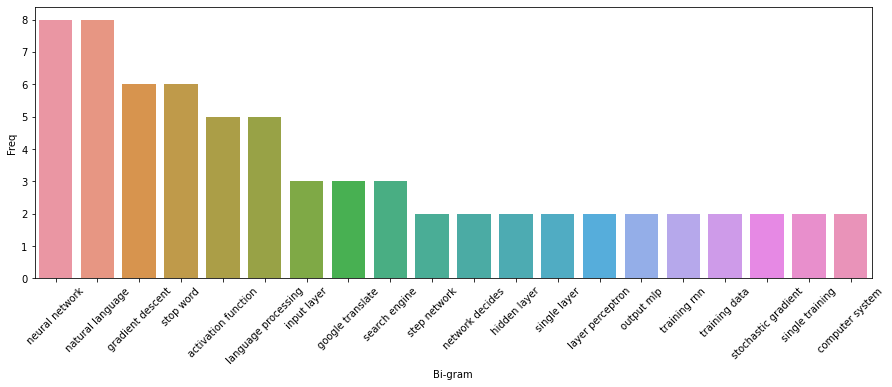

In [20]:
top_uni = top_200.iloc[0:20,:]
fig = plt.figure(figsize = (15, 5))
plot=sns.barplot(x=top_uni["Bi-gram"],y=top_uni["Freq"])
plot.set_xticklabels(rotation=45,labels = top_uni["Bi-gram"])

###  Bigrams for Questions in Machine Learning

In [22]:
def get_bigrams(corpus, n=None):
    cv_2= CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_words = cv_2.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_2.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [23]:
top_words = get_bigrams(data_nlp["Questions"], n=200) 
top_200 = pd.DataFrame(top_words)
top_200.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'natural language'),
 Text(1, 0, 'language processing'),
 Text(2, 0, 'lstm network'),
 Text(3, 0, 'network work'),
 Text(4, 0, 'multilayer perceptronmlp'),
 Text(5, 0, 'gradient descent'),
 Text(6, 0, 'exploding gradient'),
 Text(7, 0, 'vanishing gradient'),
 Text(8, 0, 'propagation working'),
 Text(9, 0, 'variant propagation'),
 Text(10, 0, 'role activation'),
 Text(11, 0, 'activation function'),
 Text(12, 0, 'mean tensor'),
 Text(13, 0, 'tensor tensorflow'),
 Text(14, 0, 'recommender system'),
 Text(15, 0, 'processing nlp'),
 Text(16, 0, 'list two'),
 Text(17, 0, 'two reallife'),
 Text(18, 0, 'reallife application'),
 Text(19, 0, 'application natural')]

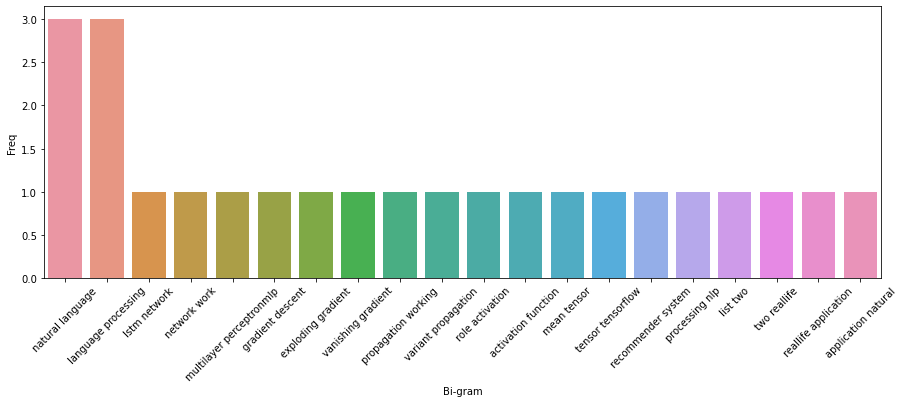

In [24]:
top_bi = top_200.iloc[0:20,:]
fig = plt.figure(figsize = (15, 5))
plot=sns.barplot(x=top_bi["Bi-gram"],y=top_bi["Freq"])
plot.set_xticklabels(rotation=45,labels = top_bi["Bi-gram"])

### WordCloud for Answers in Machine Learning

In [25]:
from wordcloud import WordCloud

In [26]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [44]:
doc = ','.join(data_da["Answers"])

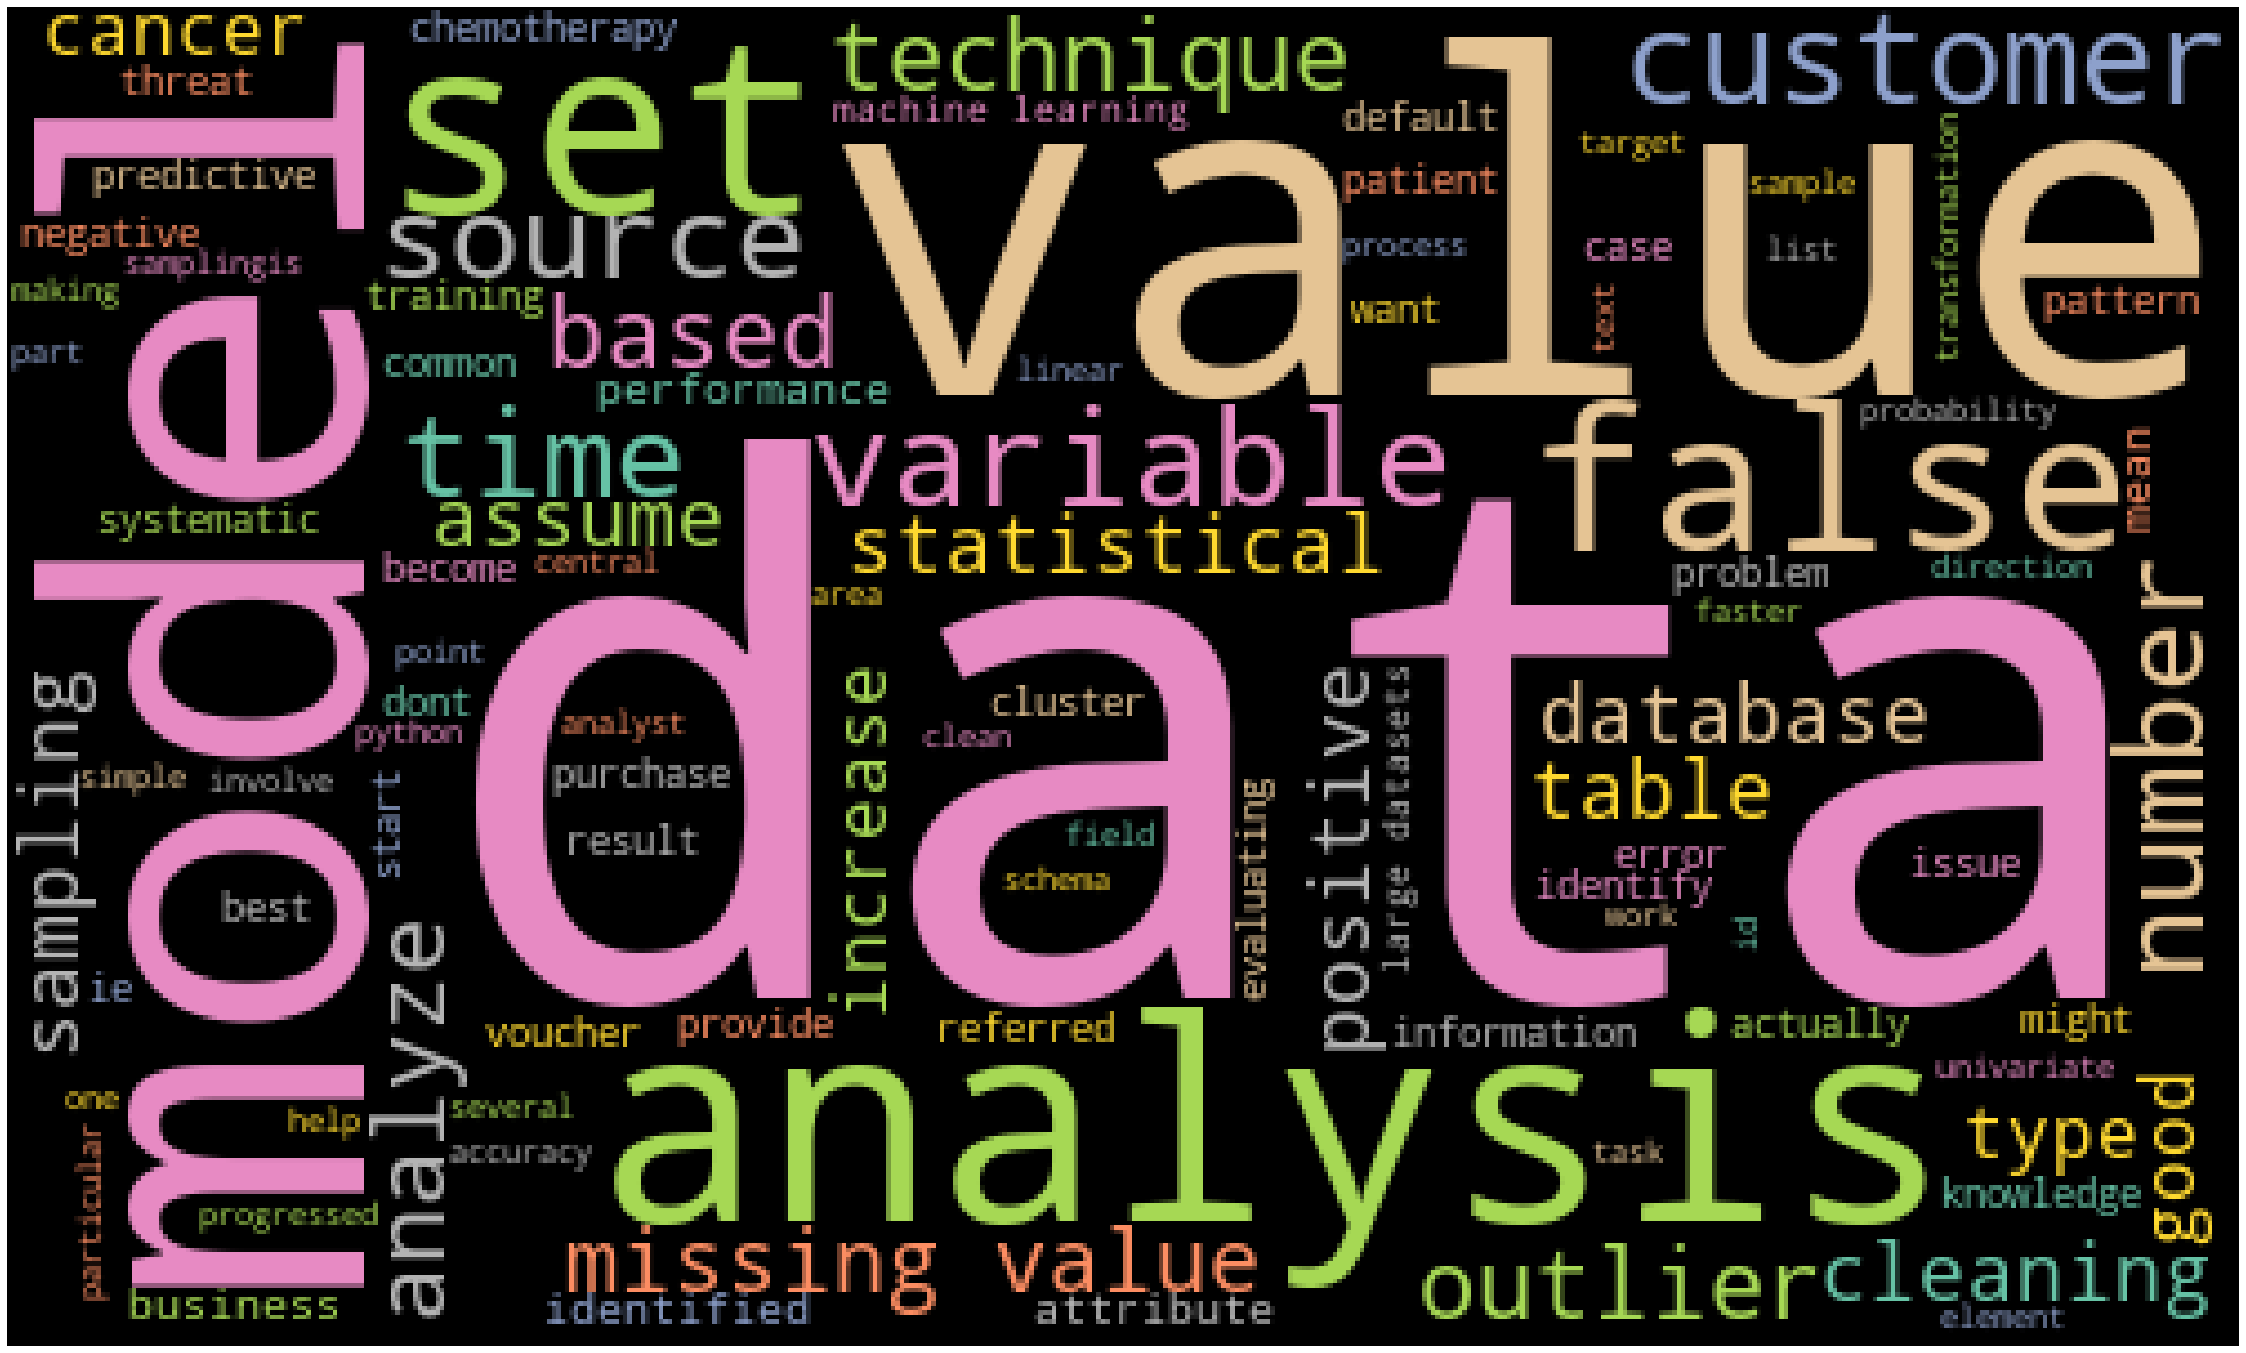

In [45]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(doc)
plot_cloud(wordcloud)

### WordCloud for Questions in Machine Learning

In [46]:
doc_ml = ','.join(data_da["Questions"])

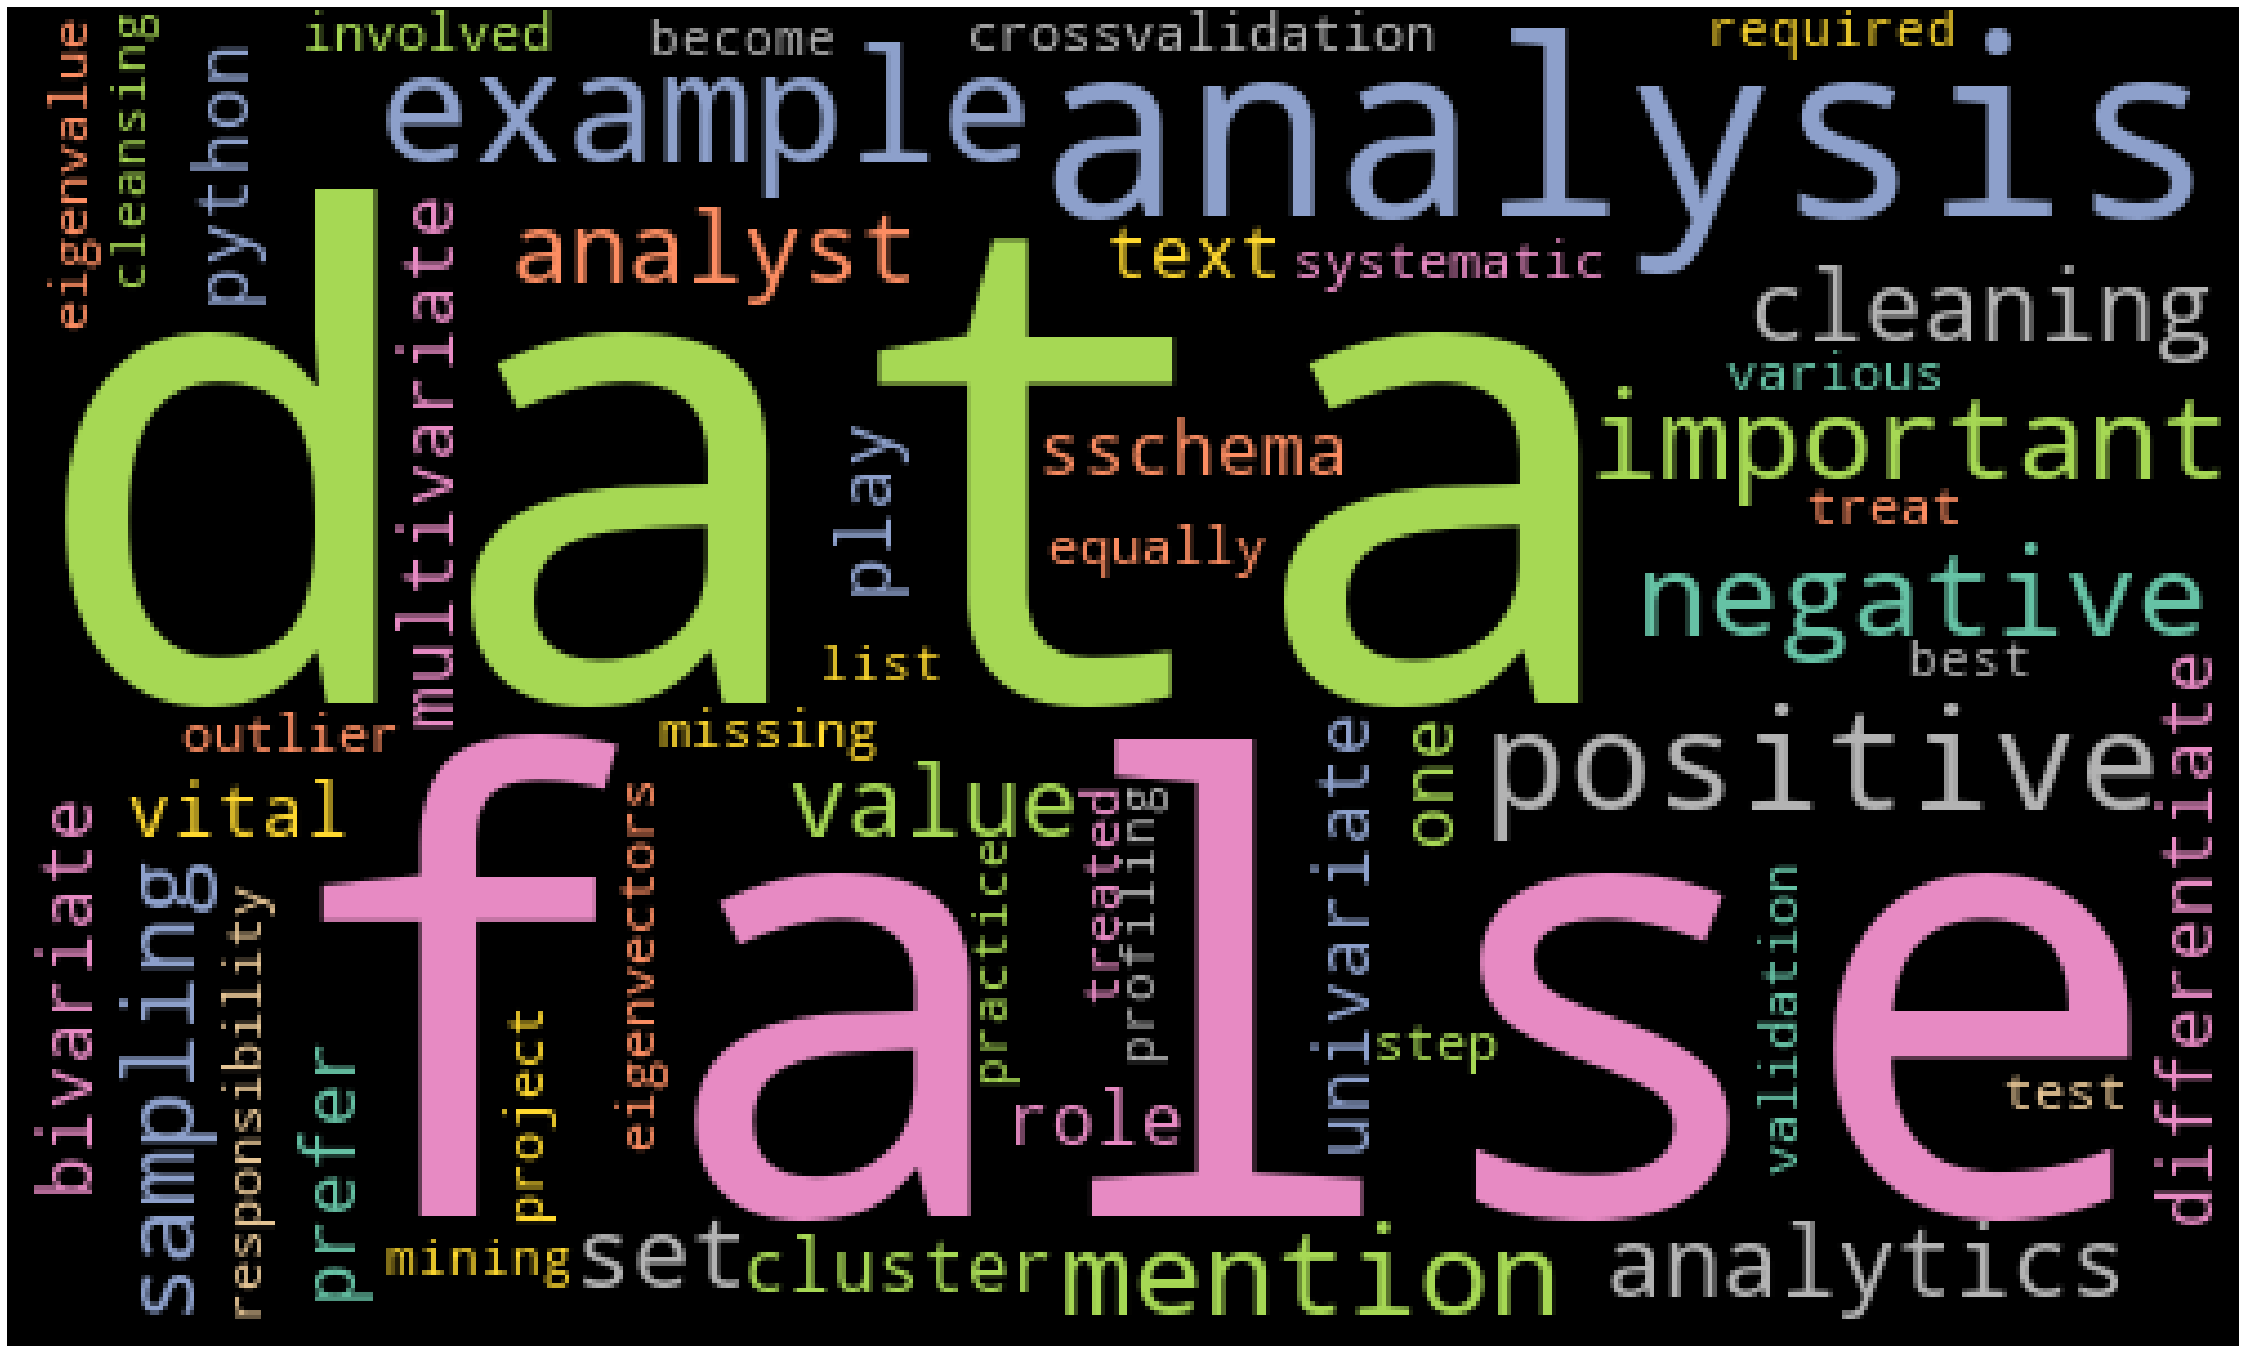

In [47]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(doc_ml)
plot_cloud(wordcloud)

### Bigram for Answers in Deep Learning

In [58]:
def get_bigrams(corpus, n=None):
    cv_2= CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_words = cv_2.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_2.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [59]:
top_words = get_bigrams(data_stat["Answers"], n=200) 
top_200 = pd.DataFrame(top_words)
top_200.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'null hypothesis'),
 Text(1, 0, 'random variable'),
 Text(2, 0, 'population parameter'),
 Text(3, 0, 'left right'),
 Text(4, 0, 'two variable'),
 Text(5, 0, 'pvalue indicates'),
 Text(6, 0, 'probability seeing'),
 Text(7, 0, 'probability selecting'),
 Text(8, 0, 'dependent variable'),
 Text(9, 0, 'bias left'),
 Text(10, 0, 'normal distribution'),
 Text(11, 0, 'bellshaped curve'),
 Text(12, 0, 'two mathematical'),
 Text(13, 0, 'two random'),
 Text(14, 0, 'parameter confidence'),
 Text(15, 0, 'confidence interval'),
 Text(16, 0, 'contain population'),
 Text(17, 0, 'ab testing'),
 Text(18, 0, 'strength result'),
 Text(19, 0, 'indicates strength')]

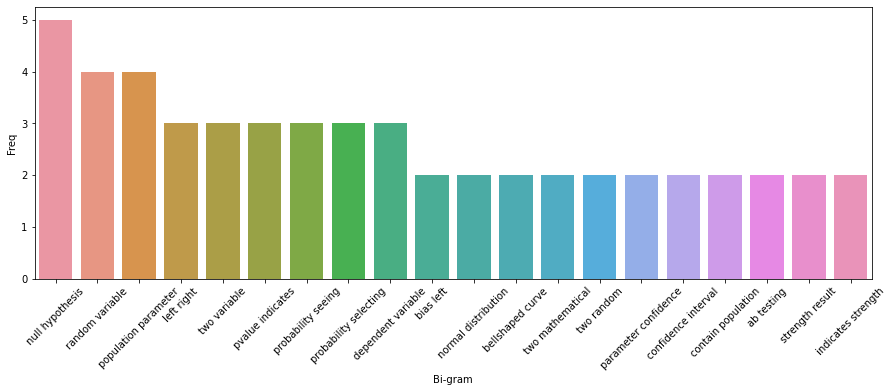

In [60]:
top_uni = top_200.iloc[0:20,:]
fig = plt.figure(figsize = (15, 5))
plot=sns.barplot(x=top_uni["Bi-gram"],y=top_uni["Freq"])
plot.set_xticklabels(rotation=45,labels = top_uni["Bi-gram"])

###  Bigrams for Questions in Deep Learning

In [61]:
def get_bigrams(corpus, n=None):
    cv_2= CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_words = cv_2.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_2.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [62]:
top_words = get_bigrams(data_stat["Questions"], n=200) 
top_200 = pd.DataFrame(top_words)
top_200.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'least one'),
 Text(1, 0, 'probability least'),
 Text(2, 0, 'one shooting'),
 Text(3, 0, 'overfitting underfitting'),
 Text(4, 0, 'long wide'),
 Text(5, 0, 'wide format'),
 Text(6, 0, 'format data'),
 Text(7, 0, 'understand term'),
 Text(8, 0, 'term normal'),
 Text(9, 0, 'normal distribution'),
 Text(10, 0, 'correlation covariance'),
 Text(11, 0, 'covariance statistic'),
 Text(12, 0, 'point estimate'),
 Text(13, 0, 'estimate confidence'),
 Text(14, 0, 'confidence interval'),
 Text(15, 0, 'goal ab'),
 Text(16, 0, 'ab testing'),
 Text(17, 0, 'minute interval'),
 Text(18, 0, 'interval probability'),
 Text(19, 0, 'shooting probability')]

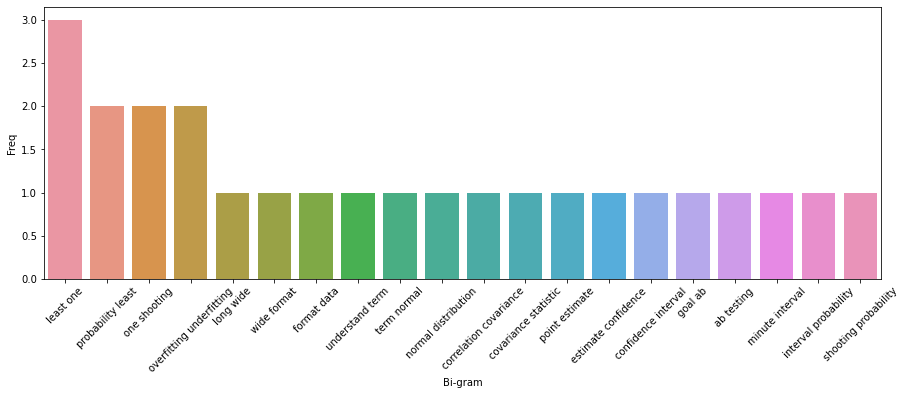

In [63]:
top_bi = top_200.iloc[0:20,:]
fig = plt.figure(figsize = (15, 5))
plot=sns.barplot(x=top_bi["Bi-gram"],y=top_bi["Freq"])
plot.set_xticklabels(rotation=45,labels = top_bi["Bi-gram"])

### WordCloud for Answers in Deep Learning

In [64]:
doc_dl = ','.join(data_stat["Answers"])

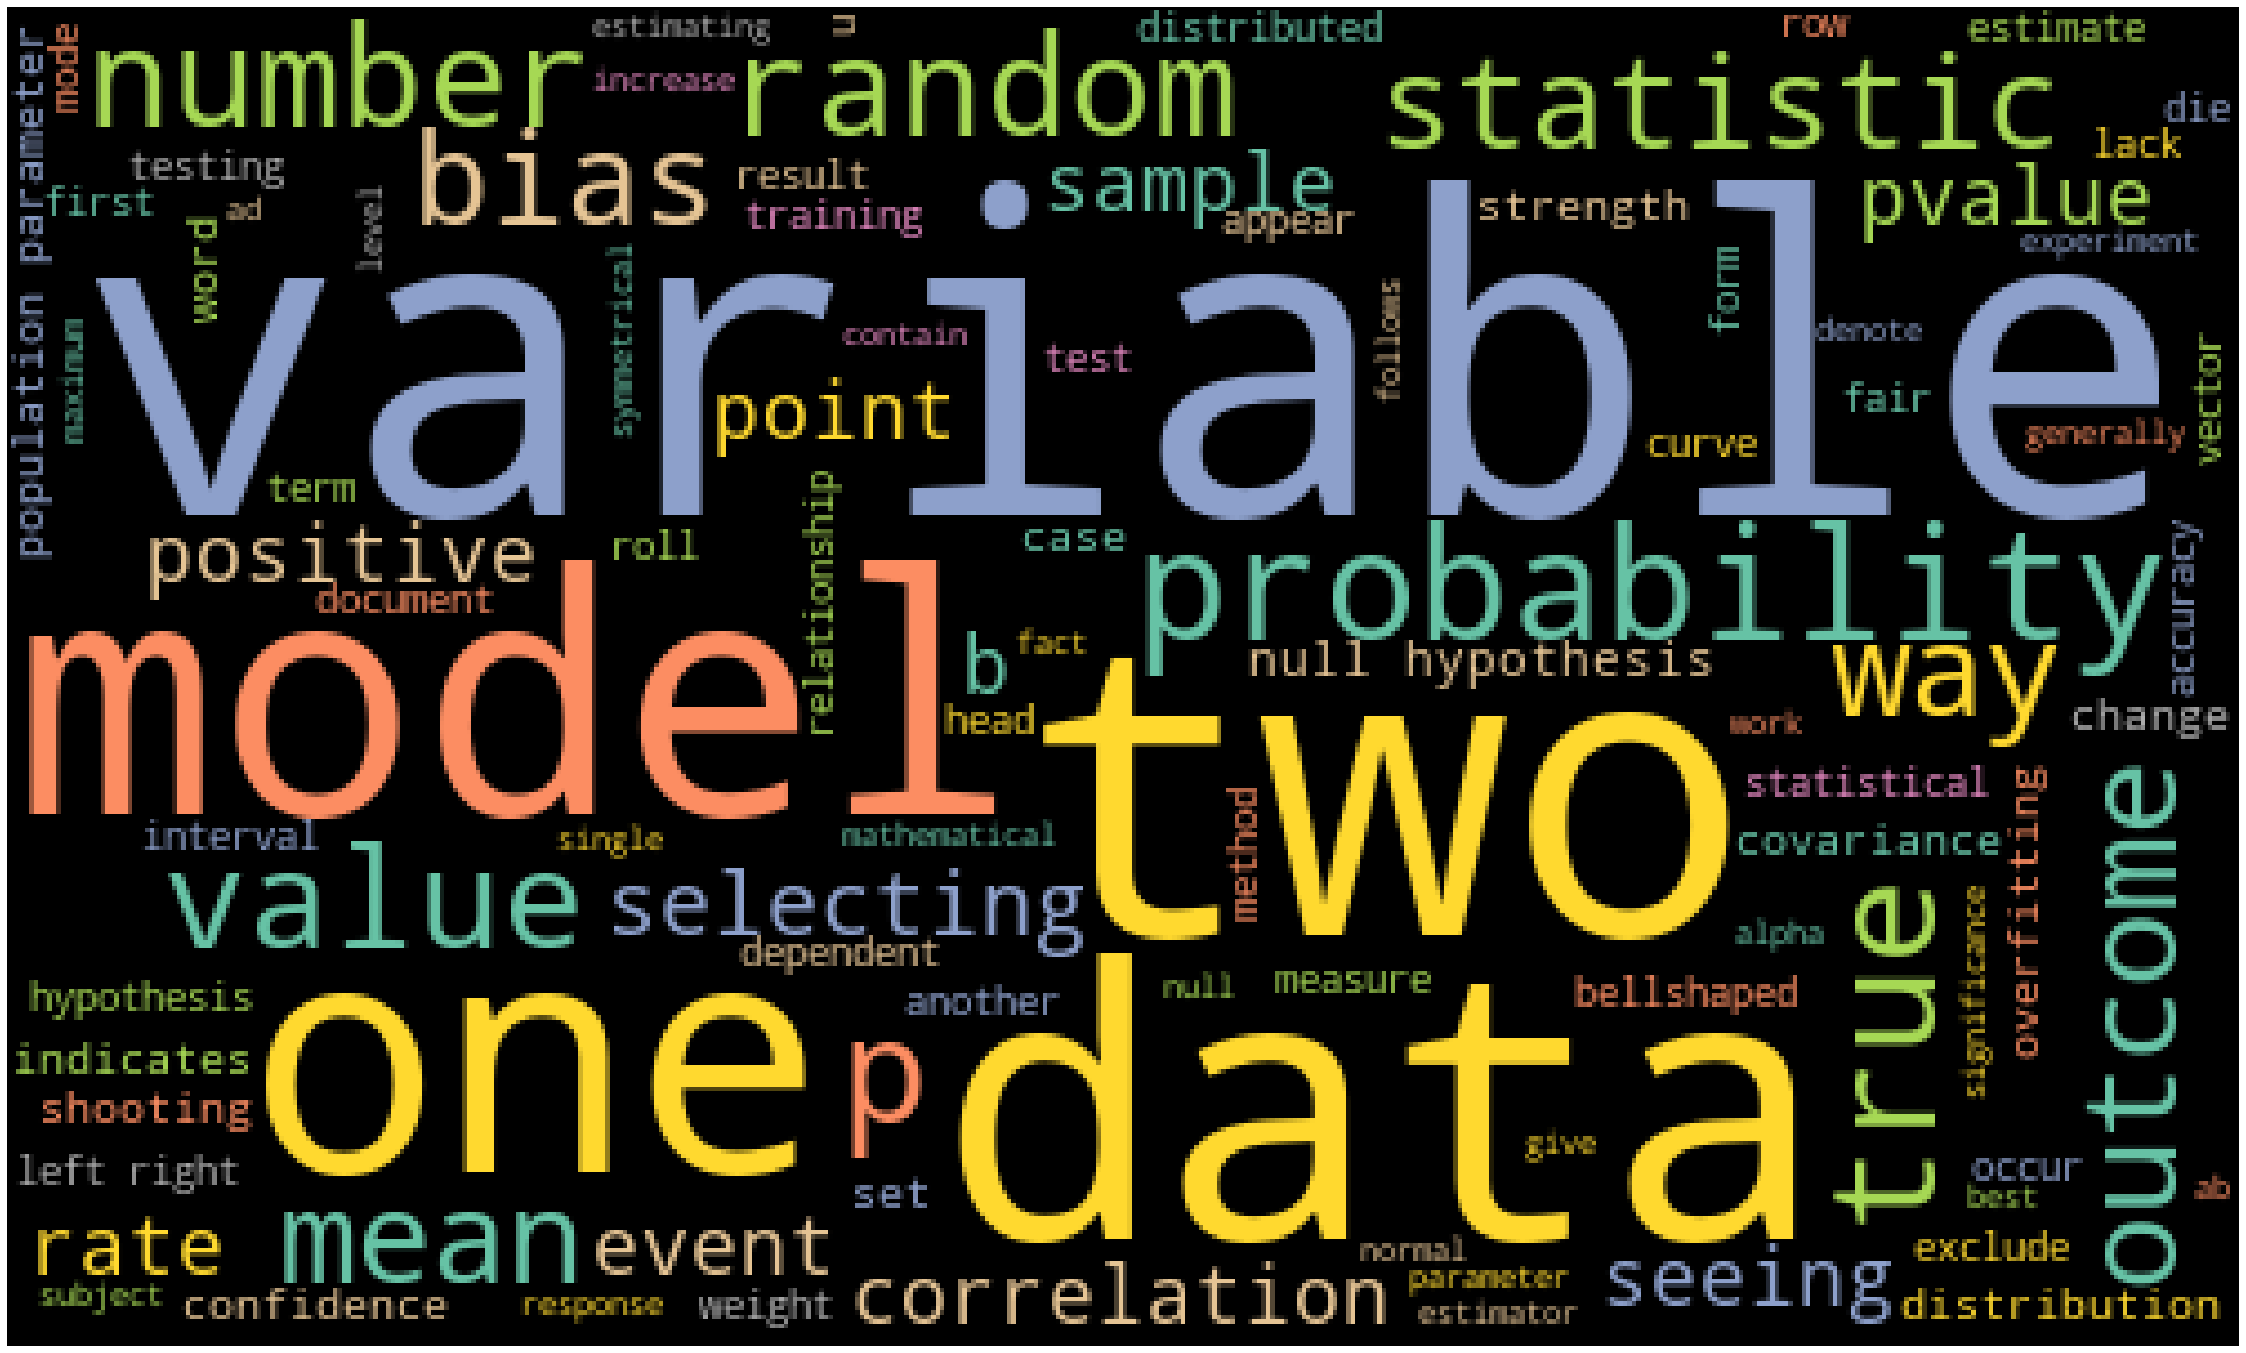

In [65]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(doc_dl)
plot_cloud(wordcloud)

### WordCloud for Questions in Deep Learning

In [66]:
doc_dl_ans = ','.join(data_stat["Questions"])

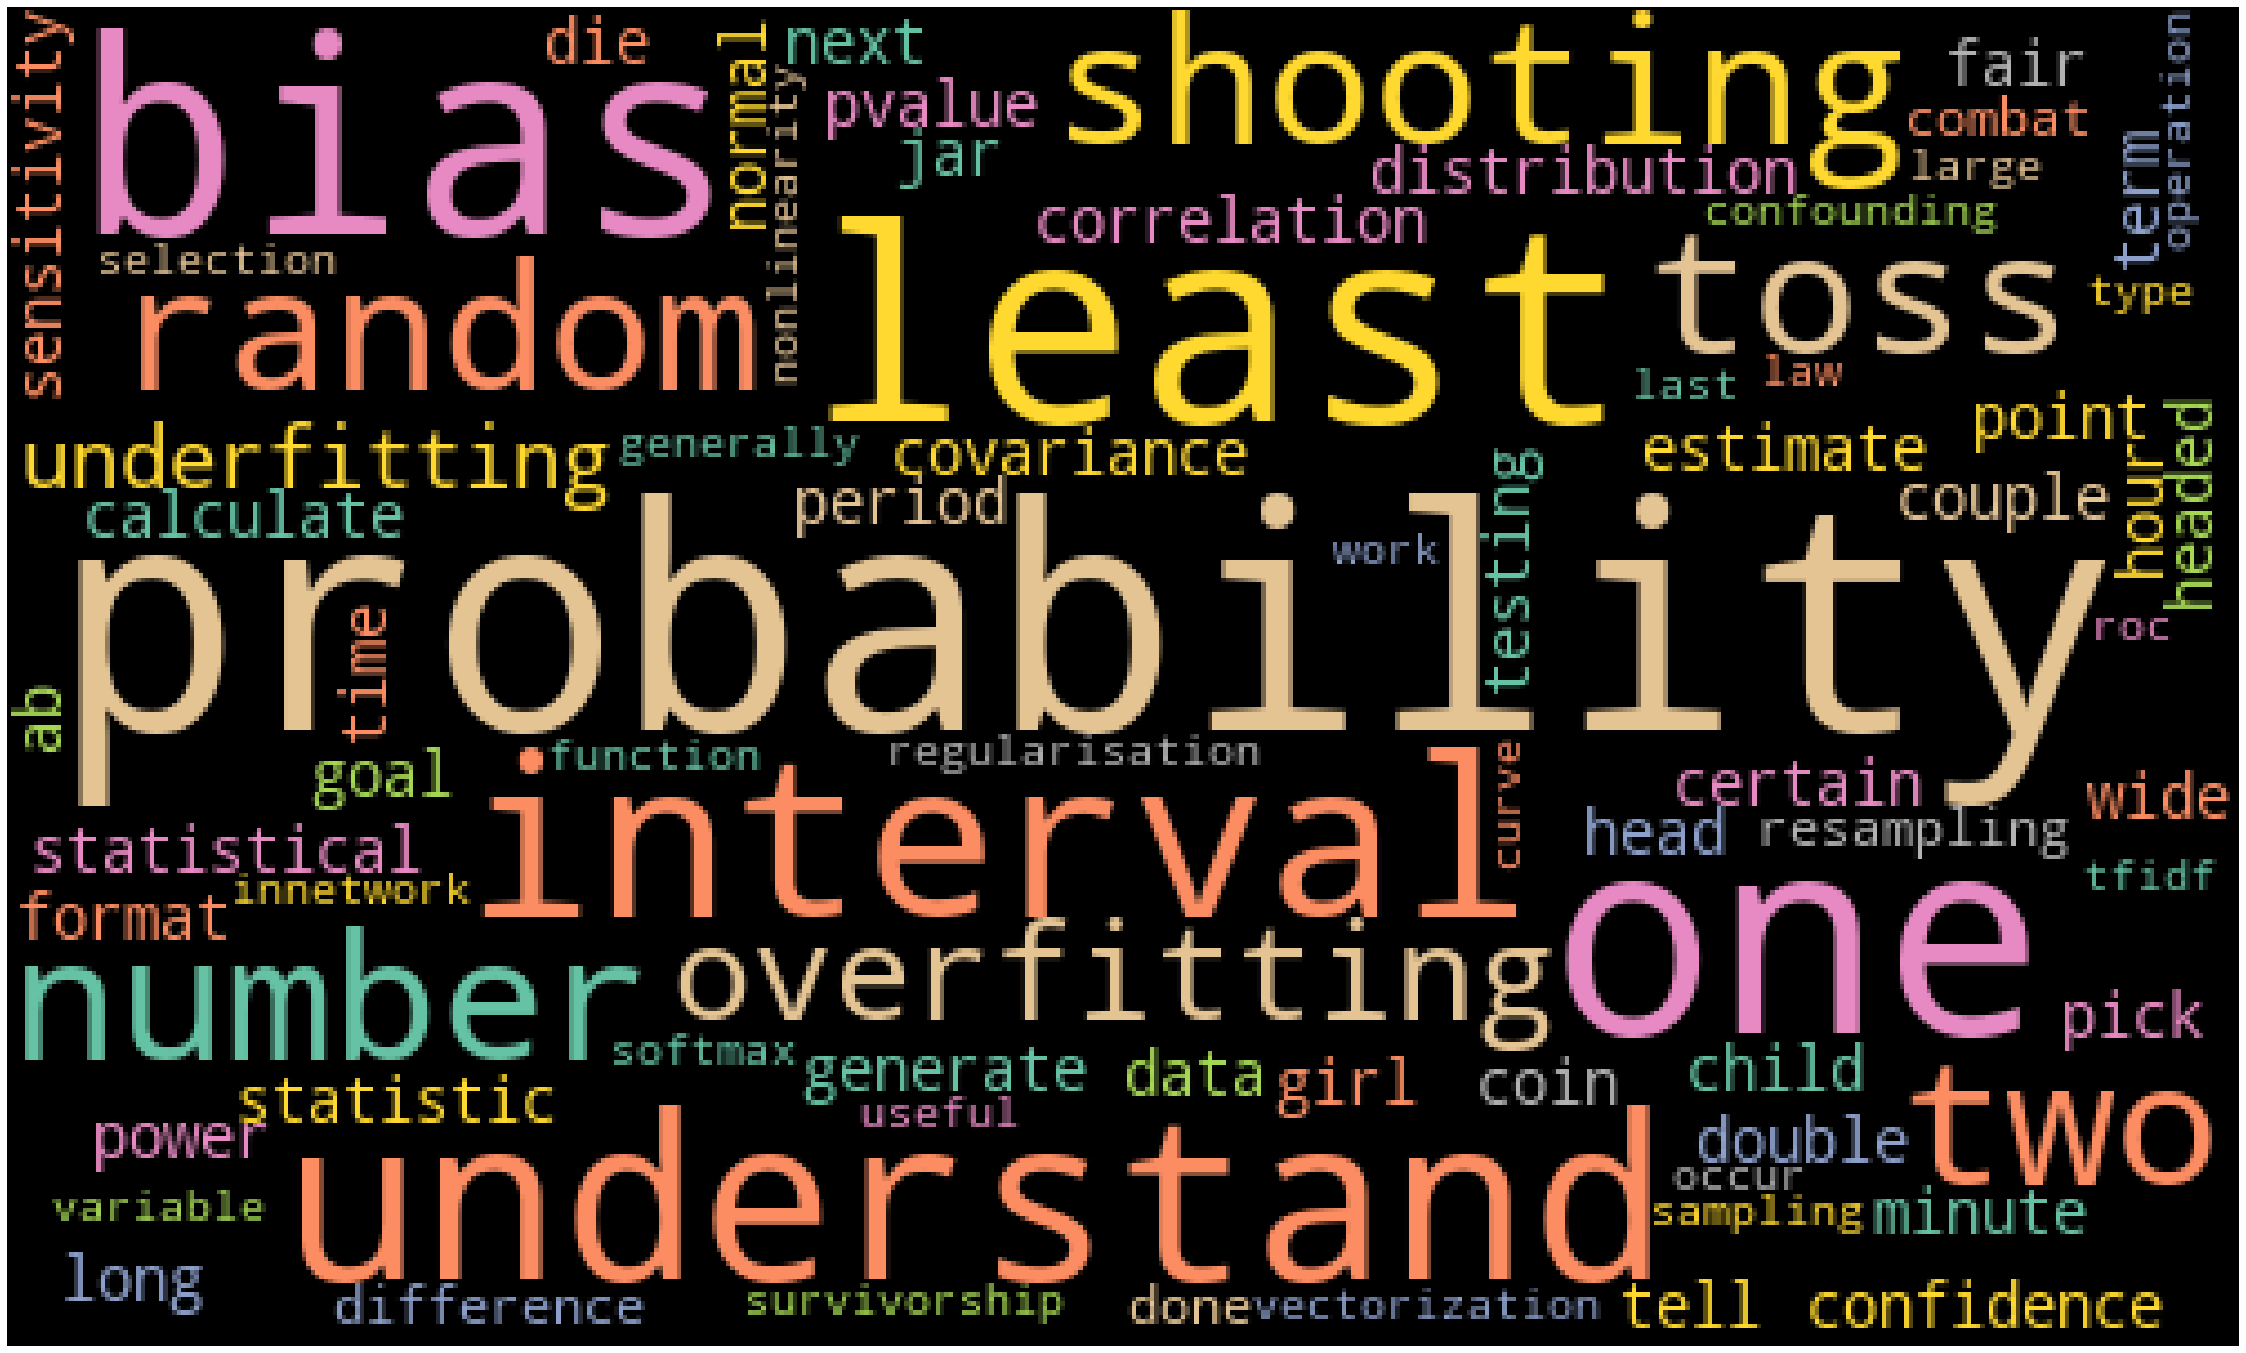

In [67]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(doc_dl_ans)
plot_cloud(wordcloud)

###  Bigrams for Answers 

In [82]:
from sklearn.feature_extraction.text import CountVectorizer

In [83]:
def get_bigrams(corpus, n=None):
    cv_2= CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus)
    bag_words = cv_2.transform(corpus)
    sum_words = bag_words.sum(axis=0) 
    freq_words = [(word, sum_words[0, idx]) for word, idx in cv_2.vocabulary_.items()]
    freq_words =sorted(freq_words, key = lambda x: x[1], reverse=True)
    return freq_words[:n]

In [86]:
top_words = get_bigrams(data["Questions"], n=200) 
top_200 = pd.DataFrame(top_words)
top_200.columns=["Bi-gram", "Freq"]

[Text(0, 0, 'deep learning'),
 Text(1, 0, 'least one'),
 Text(2, 0, 'false positive'),
 Text(3, 0, 'false negative'),
 Text(4, 0, 'machine learning'),
 Text(5, 0, 'decision tree'),
 Text(6, 0, 'random forest'),
 Text(7, 0, 'natural language'),
 Text(8, 0, 'language processing'),
 Text(9, 0, 'unsupervised learning'),
 Text(10, 0, 'selection bias'),
 Text(11, 0, 'confusion matrix'),
 Text(12, 0, 'term normal'),
 Text(13, 0, 'normal distribution'),
 Text(14, 0, 'probability least'),
 Text(15, 0, 'one shooting'),
 Text(16, 0, 'overfitting underfitting'),
 Text(17, 0, 'data cleaning'),
 Text(18, 0, 'important false'),
 Text(19, 0, 'algorithm detail')]

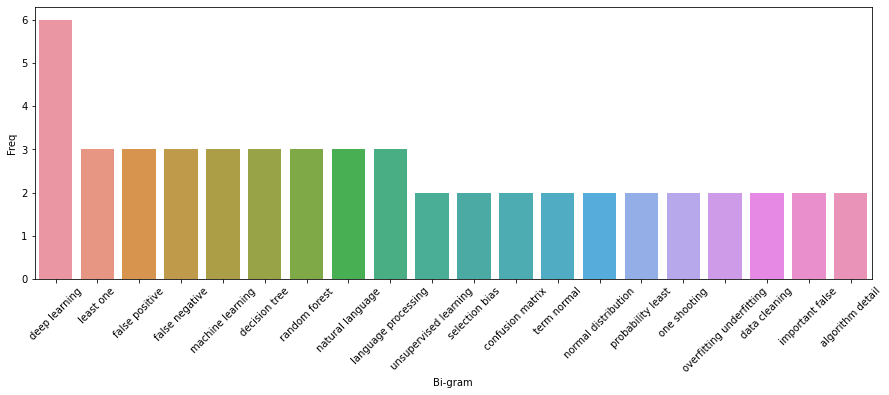

In [87]:
top_bi = top_200.iloc[0:20,:]
fig = plt.figure(figsize = (15, 5))
plot=sns.barplot(x=top_bi["Bi-gram"],y=top_bi["Freq"])
plot.set_xticklabels(rotation=45,labels = top_bi["Bi-gram"])

### WordCloud for Answers for Whole Dataset

In [88]:
from wordcloud import WordCloud

In [89]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off")

In [90]:
doc1 = ','.join(data["Answers"])

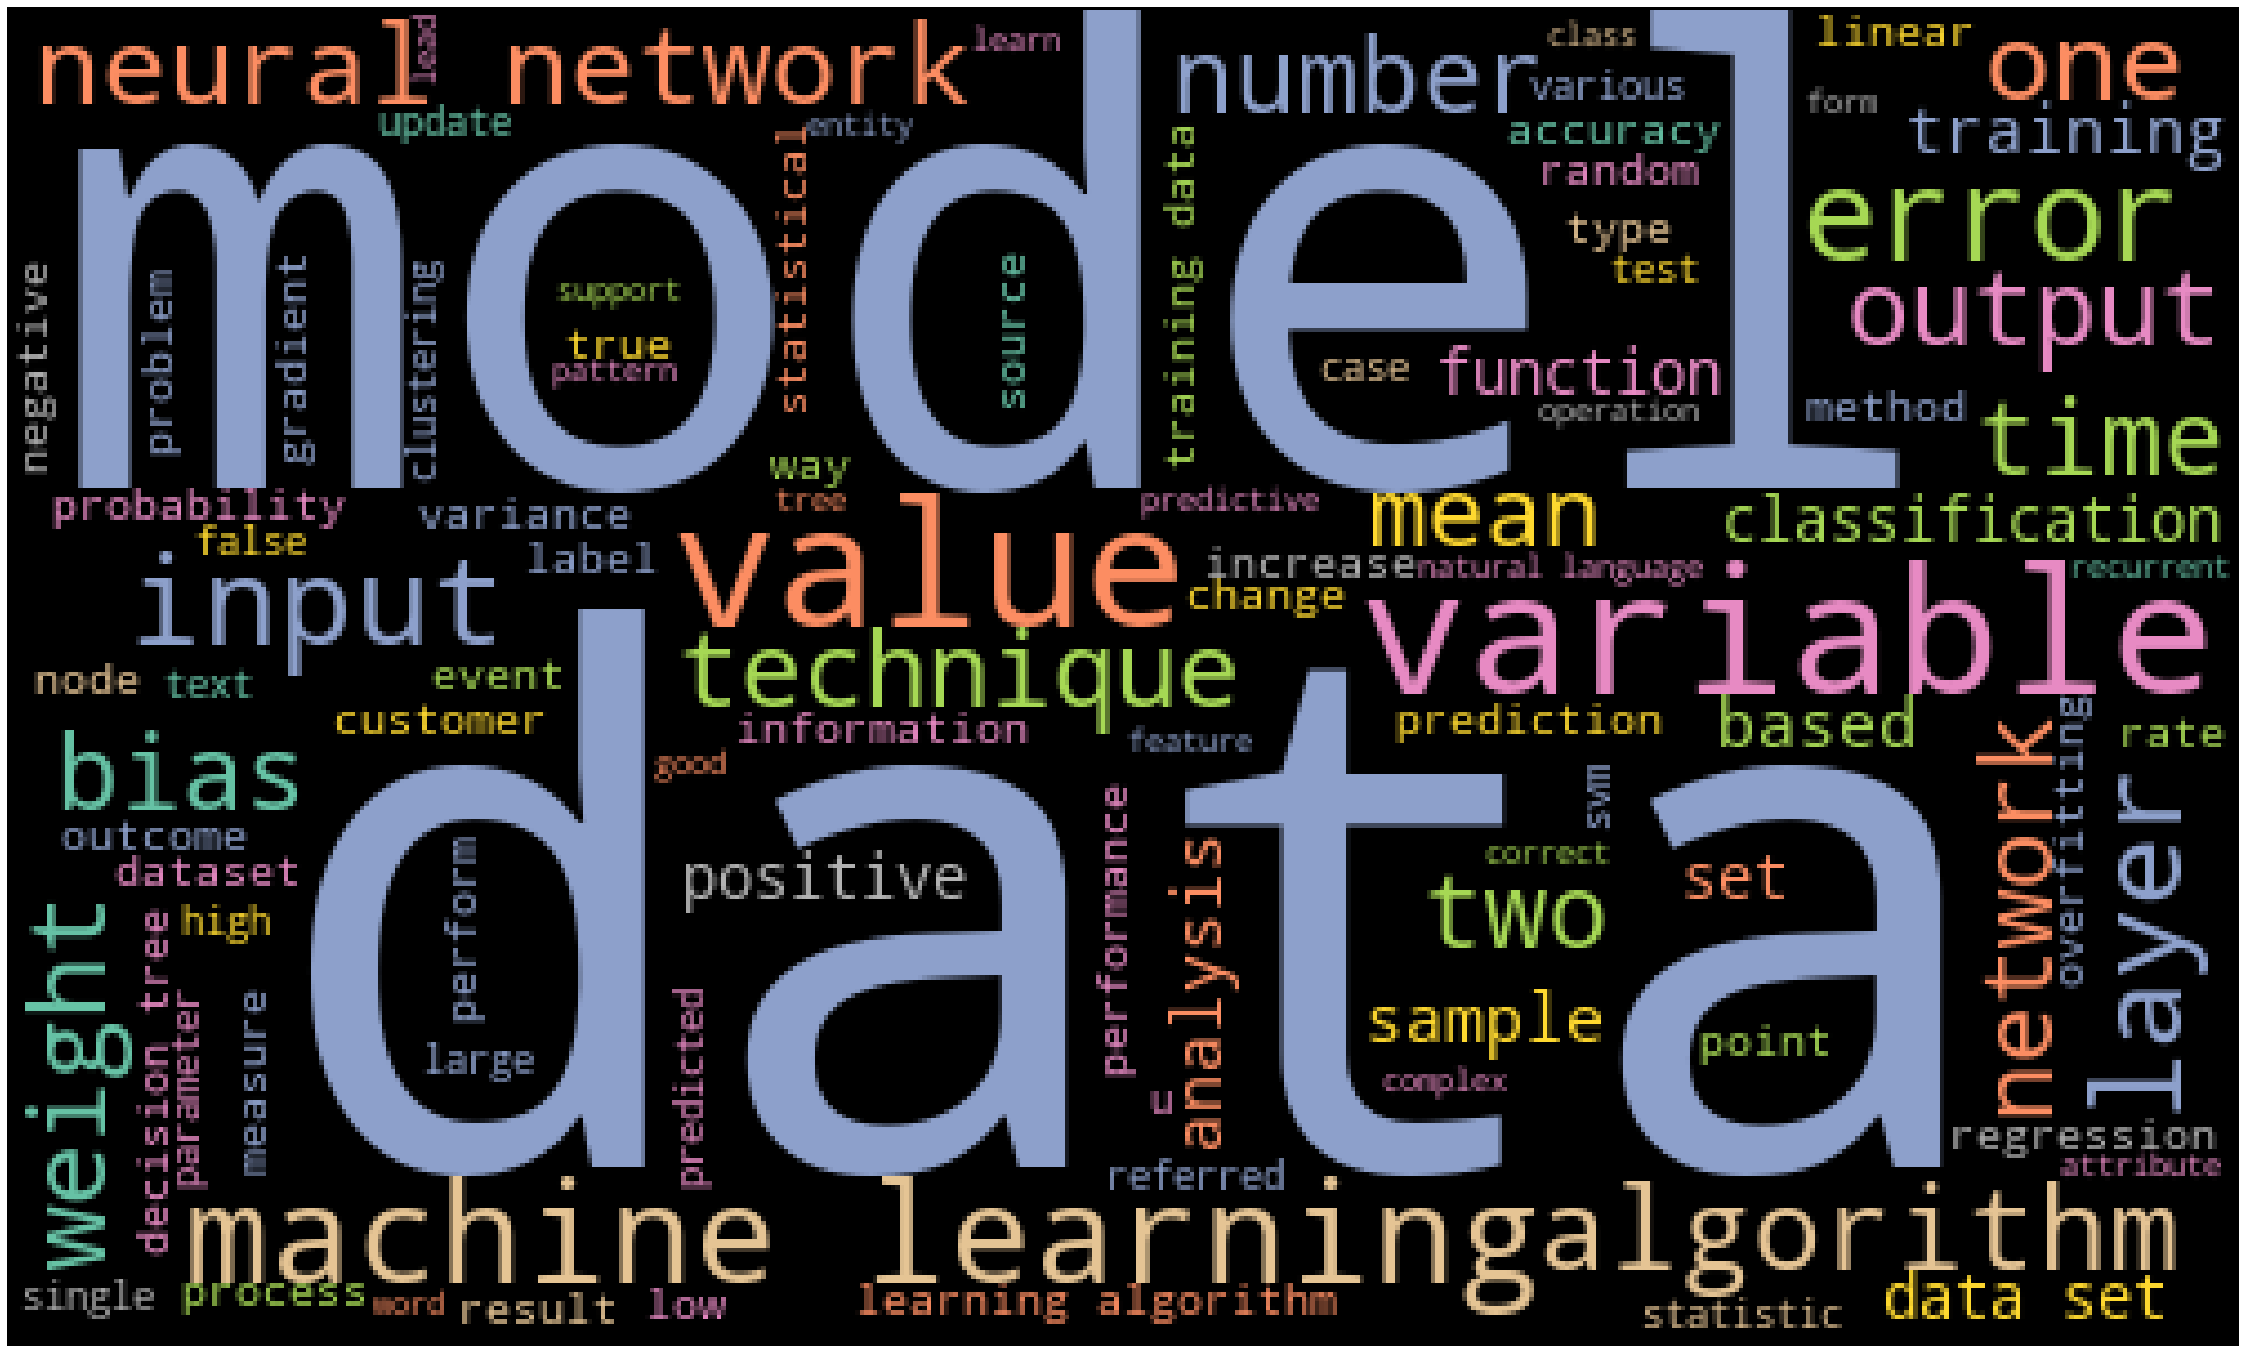

In [91]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(doc1)
plot_cloud(wordcloud)

### WordCloud for Questions for Whole Dataset

In [92]:
doc2 = ','.join(data["Questions"])

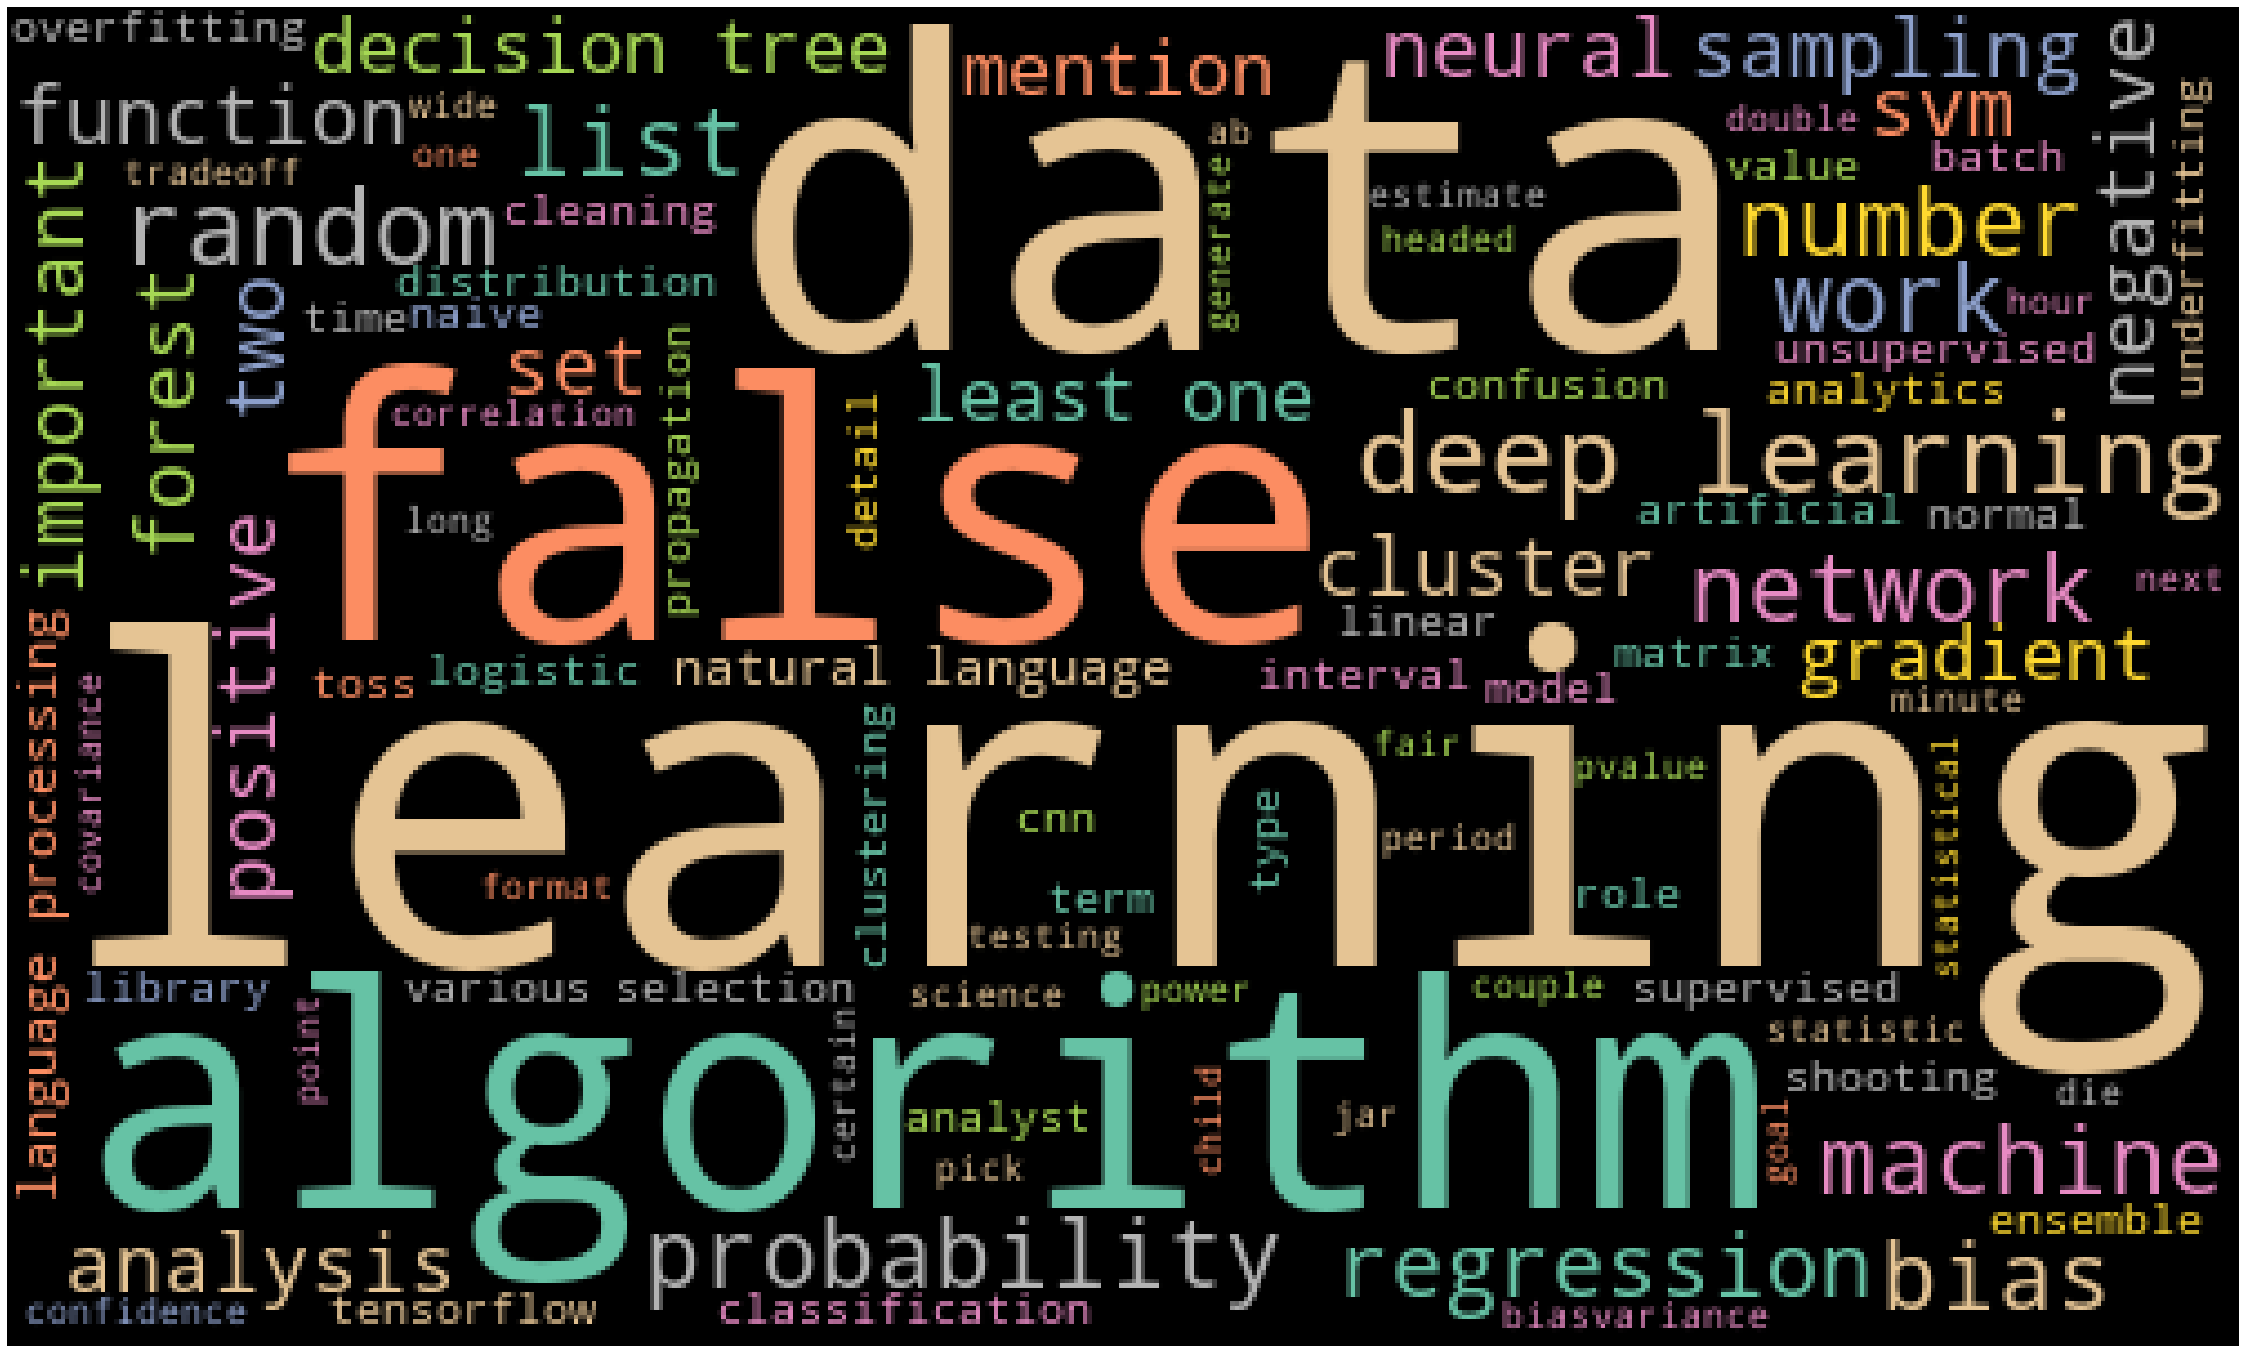

In [93]:
wordcloud = WordCloud(width = 500, height = 300, background_color='black', max_words=100,colormap='Set2').generate(doc2)
plot_cloud(wordcloud)